In [126]:
#https://www.youtube.com/watch?v=SSu00IRRraY&list=PL2-dafEMk2A6QKz1mrk1uIGfHkC1zZ6UU&index=5
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

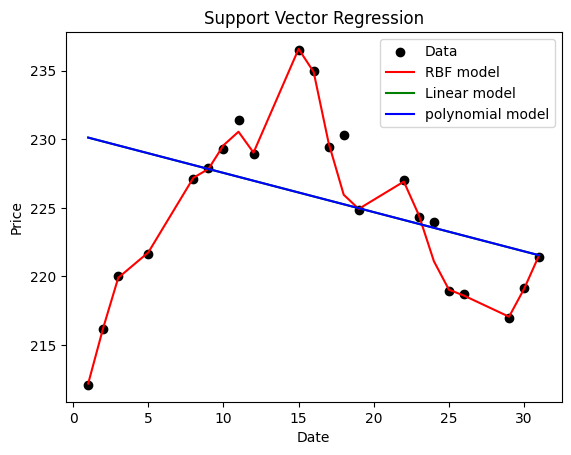

ValueError: Expected 2D array, got scalar array instead:
array=22.0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [127]:
dates = []
prices =[]


def get_data(filename):
    with open(filename,'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)
        for row in csvfile:
            dates.append(int (row.split(',')[0].split('/')[1]))     # check for dates
            prices.append(float(row.split(',')[3].replace('$',''))) #check for correct open price collumn
    return


def predict_prices(dates,prices,x):
    dates = np.reshape(dates,(len(dates),1))
    
    svr_lin = SVR(kernel='linear', C=1e3)
    svr_poly = SVR(kernel='poly', C=1e3, degree=2)
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    svr_lin.fit(dates,prices)
    svr_poly.fit(dates,prices)
    svr_rbf.fit(dates,prices)
    
    plt.scatter(dates, prices, color='black', label='Data')
    
    plt.plot(dates, svr_rbf.predict(dates), color='red', label='RBF model')
    plt.plot(dates, svr_lin.predict(dates), color='green', label='Linear model')
    plt.plot(dates, svr_lin.predict(dates), color='blue', label='polynomial model')
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    
    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)


get_data('Apple_30day.csv')
my_prediction = predict_prices(dates, prices,22)

This only works for sorted days in a month. month data has to be from 1-31. The dates cant start from middle of the month. will need to implement a feature adapt to middle of the month.